<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import keras
from keras.models import Model
from keras.layers import Dense,Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [35]:
pip install split_folders


In [39]:
import split_folders

 #Split with a ratio.To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('/content/drive/My Drive/data-liverdisease', output="/content/drive/My Drive/data_liver", seed=1337, ratio=(.7,.1,.2)) # default values

Copying files: 1000 files [06:07,  2.72 files/s]


In [11]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data_liver/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data_liver/val", target_size=(224,224))

Found 700 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [12]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet',include_top=True)

553467904/553467096 [==============================] - 7s 0us/step


In [13]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
vggmodel.layers.pop()
vggmodel.layers.pop()
vggmodel.layers.pop()

In [15]:
for layers in (vggmodel.layers):
    print(layers)
    layers.trainable = False

In [16]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
from tensorflow.keras import regularizers
X= vggmodel.layers[-1].output
fc_1=Dense(4096,activation='relu')(X)
dr_1=Dropout(0.5)(fc_1)
fc_2=Dense(4096, activation='relu')(dr_1)
dr_2=Dropout(0.5)(fc_2)
predictions = Dense(4, activation="softmax")(dr_2)
model_final = Model(input = vggmodel.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [18]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [19]:
model_final.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [20]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/My Drive/Best models/model_i_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
hist=model_final.fit(traindata, steps_per_epoch= 64, epochs= 30, validation_data= testdata, validation_steps=16, callbacks=[checkpoint,early])

Epoch 1/30
64/64 [==============================] - 1311s 20s/step - loss: 1.3763 - accuracy: 0.7608 - val_loss: 1.1553 - val_accuracy: 0.8300

Epoch 00001: val_accuracy improved from -inf to 0.83000, saving model to /content/drive/My Drive/Best models/model_i_1.h5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/30
64/64 [==============================] - 1348s 21s/step - loss: 0.5529 - accuracy: 0.8993 - val_loss: 0.0498 - val_accuracy: 0.8700

Epoch 00002: val_accuracy improved from 0.83000 to 0.87000, saving model to /content/drive/My Drive/Best models/model_i_1.h5
Epoch 3/30
64/64 [==============================] - 1323s 21s/step - loss: 0.2621 - accuracy: 0.9391 - val_loss: 0.2133 - val_accuracy: 0.8600

Epoch 00003: val_accuracy did not improve from 0.87000
Epoch 4/30
64/64 [==============================] - 1309s 20s/step - loss: 0.2014 - accuracy: 0.9519 - val_loss: 0.0119 - val_accuracy: 0.8300

Epoch 00004: val_accuracy did not improve from 0.87000
Epoch 5/30
64/64 [==============================] - 1316s 21s/step - loss: 0.1921 - accuracy: 0.9632 - val_loss: 3.8505 - val_accuracy: 0.8600

Epoch 00005: val_accuracy did not improve from 0.87000
Epoch 6/30
64/64 [==============================] - 1307s 20s/step - loss: 0.0618 - accuracy: 0.9828 - val_loss: 1.0418e-04 - val_accu

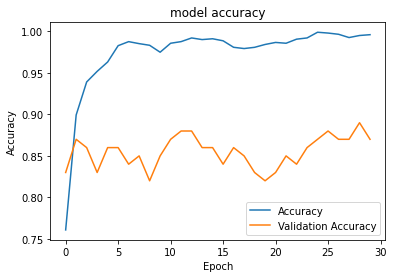

In [23]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

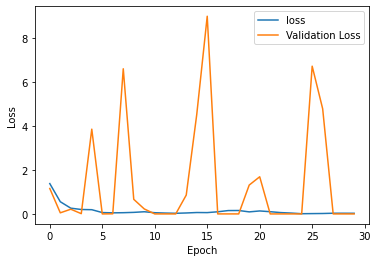

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [26]:
model_final.save("/content/drive/My Drive/Best models/model_j_1.h5")

In [2]:
model_cnn=keras.models.load_model("/content/drive/My Drive/Best models/model_i_1.h5")

NameError: ignored

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [28]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data_liver/test',
                                                        target_size=(224, 224))

Found 200 images belonging to 4 classes.


In [29]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_final.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
#target_names = ['grade1', 'grade0', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred))

Confusion Matrix
[[17 13  9 11]
 [12  9 14 15]
 [ 8 14 14 14]
 [10  8 17 15]]
Classification Report
              precision    recall  f1-score   support

           0       0.36      0.34      0.35        50
           1       0.20      0.18      0.19        50
           2       0.26      0.28      0.27        50
           3       0.27      0.30      0.29        50

    accuracy                           0.28       200
   macro avg       0.27      0.28      0.27       200
weighted avg       0.27      0.28      0.27       200



In [ ]:
import os
import numpy as np
actual=[]
predicted=[]
data_path='/content/drive/My Drive/data_liver/test'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
    actual.append(img[:6])
    predicted.append(ans)
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))

grade1
correct Count 33 WrongCount 17
grade0
correct Count 45 WrongCount 5
grade2
correct Count 48 WrongCount 2
grade3
correct Count 45 WrongCount 5


In [1]:
actual

NameError: ignored

In [31]:
tr_loss,tr_acc=model_final.evaluate(validation_generator)
tr_acc

7/7 [==============================] - 101s 14s/step


0.8550000190734863

In [9]:
tr_loss,tr_acc=model_final.evaluate(traindata)
tr_acc

22/22 [==============================] - 358s 16s/step


1.0

In [11]:
tr_loss,tr_acc=model_final.evaluate(testdata)
tr_acc

4/4 [==============================] - 58s 15s/step


0.8999999761581421

In [6]:
saved_model=keras.models.load_model("/content/drive/My Drive/Best models/model_b_1.h5")

In [7]:
tr_loss,tr_acc=saved_model.evaluate(validation_generator)
tr_acc

4/4 [==============================] - 51s 13s/step


0.8799999952316284

In [10]:
tr_loss,tr_acc=saved_model.evaluate(testdata)
tr_acc

4/4 [==============================] - 51s 13s/step


0.7900000214576721

In [32]:
model_final=keras.models.load_model("/content/drive/My Drive/Best models/model_f_1.h5")